In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("customer_data.csv")
main_df = df.copy()

In [100]:
df.head()

,CustomerID,Name,Age,Gender,Country,SignupDate,LastLogin,TotalPurchase,PreferredDevice,Email
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Christopher Williams,63.0,Male,USA,2021-12-22,2023-09-12,2141.15,dasktop,margaret03@bullock.info
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Kevin Hopkins,42.0,Female,UK,2023-04-21,2024-06-28,2863.67,NaN,tammy76@mcintyre.org
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Sonya Stafford,76.0,Femlae,UK,2020-09-16,2023-06-13,2427.18,NaN,lauramichael@hotmail.com
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Matthew Schmidt,53.0,Unknown,Indai,2021-05-16,2024-12-15,5986.07,moblie,@example.com
4,e443df78-9558-467f-9ba9-1faf7a024204,Kristen Banks,74.0,NaN,UK,2022-04-14,2025-01-08,3374.72,dasktop,blacknicole@smith-lewis.com


In [101]:
df.shape

(51000, 10)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       50501 non-null  object 
 1   Name             51000 non-null  object 
 2   Age              48417 non-null  float64
 3   Gender           36365 non-null  object 
 4   Country          38330 non-null  object 
 5   SignupDate       49957 non-null  object 
 6   LastLogin        49939 non-null  object 
 7   TotalPurchase    48601 non-null  float64
 8   PreferredDevice  33878 non-null  object 
 9   Email            49696 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.9+ MB


In [103]:
# Changing data types of SignupDate and LastLogin to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')    
df['LastLogin'] = pd.to_datetime(df['LastLogin'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       50501 non-null  object        
 1   Name             51000 non-null  object        
 2   Age              48417 non-null  float64       
 3   Gender           36365 non-null  object        
 4   Country          38330 non-null  object        
 5   SignupDate       49957 non-null  datetime64[ns]
 6   LastLogin        49939 non-null  datetime64[ns]
 7   TotalPurchase    48601 non-null  float64       
 8   PreferredDevice  33878 non-null  object        
 9   Email            49696 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 3.9+ MB


In [104]:
df.isnull().sum()

CustomerID           499
Name                   0
Age                 2583
Gender             14635
Country            12670
SignupDate          1043
LastLogin           1061
TotalPurchase       2399
PreferredDevice    17122
Email               1304
dtype: int64

#### CustomerID, Name, Email are rows with unique identifiers
#### Age, TotalPurchase are Numerical
#### Gender, Country, PreferredDevice are Categorical
#### SignupDate, LastLogin are Dates

In [105]:
# Dropping null rows of CustomerID and Email, since they don't add value to the analysis
df.drop(df.index[df['CustomerID'].isnull()], inplace=True, axis=0)
df.drop(df.index[df['Email'].isnull()], inplace=True, axis=0)
df.isnull().sum()

CustomerID             0
Name                   0
Age                 2498
Gender             14116
Country            12211
SignupDate          1009
LastLogin           1016
TotalPurchase       2303
PreferredDevice    16536
Email                  0
dtype: int64

In [106]:
# Replacing the null values in the categorical columns with 'Unknown'
df['Gender'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['PreferredDevice'].fillna('Unknown', inplace=True)
df.isnull().sum()

C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\3824432564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('Unknown', inplace=True)
C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\3824432564.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

CustomerID            0
Name                  0
Age                2498
Gender                0
Country               0
SignupDate         1009
LastLogin          1016
TotalPurchase      2303
PreferredDevice       0
Email                 0
dtype: int64

In [107]:
# Replacing the null values in SignupDate and LastLogin with the NaT
df['SignupDate'].fillna(pd.NaT, inplace=True)
df['LastLogin'].fillna(pd.NaT, inplace=True)
df.isnull().sum()

C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\3274777084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SignupDate'].fillna(pd.NaT, inplace=True)
C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\3274777084.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

CustomerID            0
Name                  0
Age                2498
Gender                0
Country               0
SignupDate         1009
LastLogin          1016
TotalPurchase      2303
PreferredDevice       0
Email                 0
dtype: int64

### Univariate Analysis of Age and TotalPurchase
Let's examine the distribution of numerical variables before imputation:

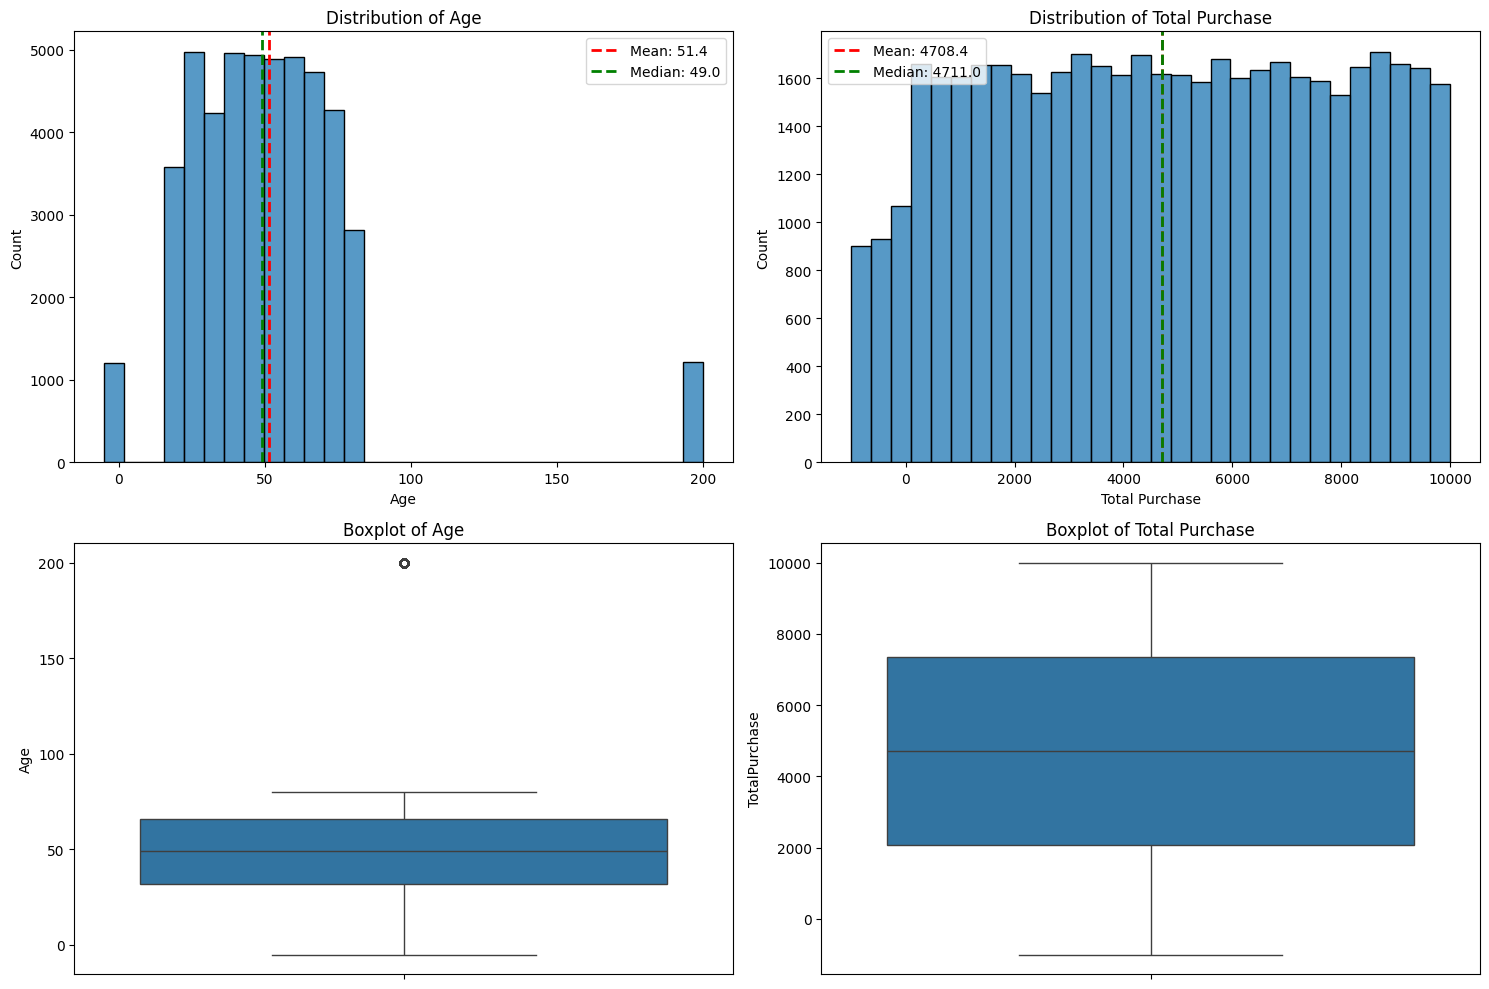


Summary Statistics for Age:
count    46710.000000
mean        51.420617
std         31.277648
min         -5.000000
25%         32.000000
50%         49.000000
75%         66.000000
max        200.000000
Name: Age, dtype: float64

Summary Statistics for TotalPurchase:
count    46905.000000
mean      4708.448791
std       3065.018339
min       -999.750000
25%       2082.750000
50%       4711.030000
75%       7347.510000
max       9999.580000
Name: TotalPurchase, dtype: float64


In [108]:
# Set up the figure for histograms
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Age with mean and median
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Plot 2: Distribution of TotalPurchase with mean and median
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='TotalPurchase', bins=30)
plt.axvline(df['TotalPurchase'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["TotalPurchase"].mean():.1f}')
plt.axvline(df['TotalPurchase'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["TotalPurchase"].median():.1f}')
plt.title('Distribution of Total Purchase')
plt.xlabel('Total Purchase')
plt.ylabel('Count')
plt.legend()

# Plot 3: Boxplot of Age
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')

# Plot 4: Boxplot of TotalPurchase
plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='TotalPurchase')
plt.title('Boxplot of Total Purchase')

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nSummary Statistics for Age:")
print(df['Age'].describe())
print("\nSummary Statistics for TotalPurchase:")
print(df['TotalPurchase'].describe())

The mean and median of both these columns are almost equal, so I will be using the median value to impute the empty cells.
---
There are some outliers in both the columns. Like Age has negative values and really high values like 200, and TotalPurchase has negative values, and these are mainly data entry errors.
I'm gonna handle the outliers by replacing it with the median.

In [109]:
# Replacing null values in Age and TotalPurchase with their respective column medians
df['Age'].fillna(df['Age'].median(), inplace=True)
df['TotalPurchase'].fillna(df['TotalPurchase'].median(), inplace=True)  
df.isnull().sum()

C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\1628494418.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Anish Dev Edward\AppData\Local\Temp\ipykernel_20648\1628494418.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

CustomerID            0
Name                  0
Age                   0
Gender                0
Country               0
SignupDate         1009
LastLogin          1016
TotalPurchase         0
PreferredDevice       0
Email                 0
dtype: int64

In [110]:
# Handling outliers by replacing them with the median
age_median = df['Age'].median()
total_purchase_median = df['TotalPurchase'].median()
df.loc[(df['Age'] < 0) | (df['Age'] > 100), 'Age'] = age_median
df.loc[df['TotalPurchase'] < 0, 'TotalPurchase'] = total_purchase_median

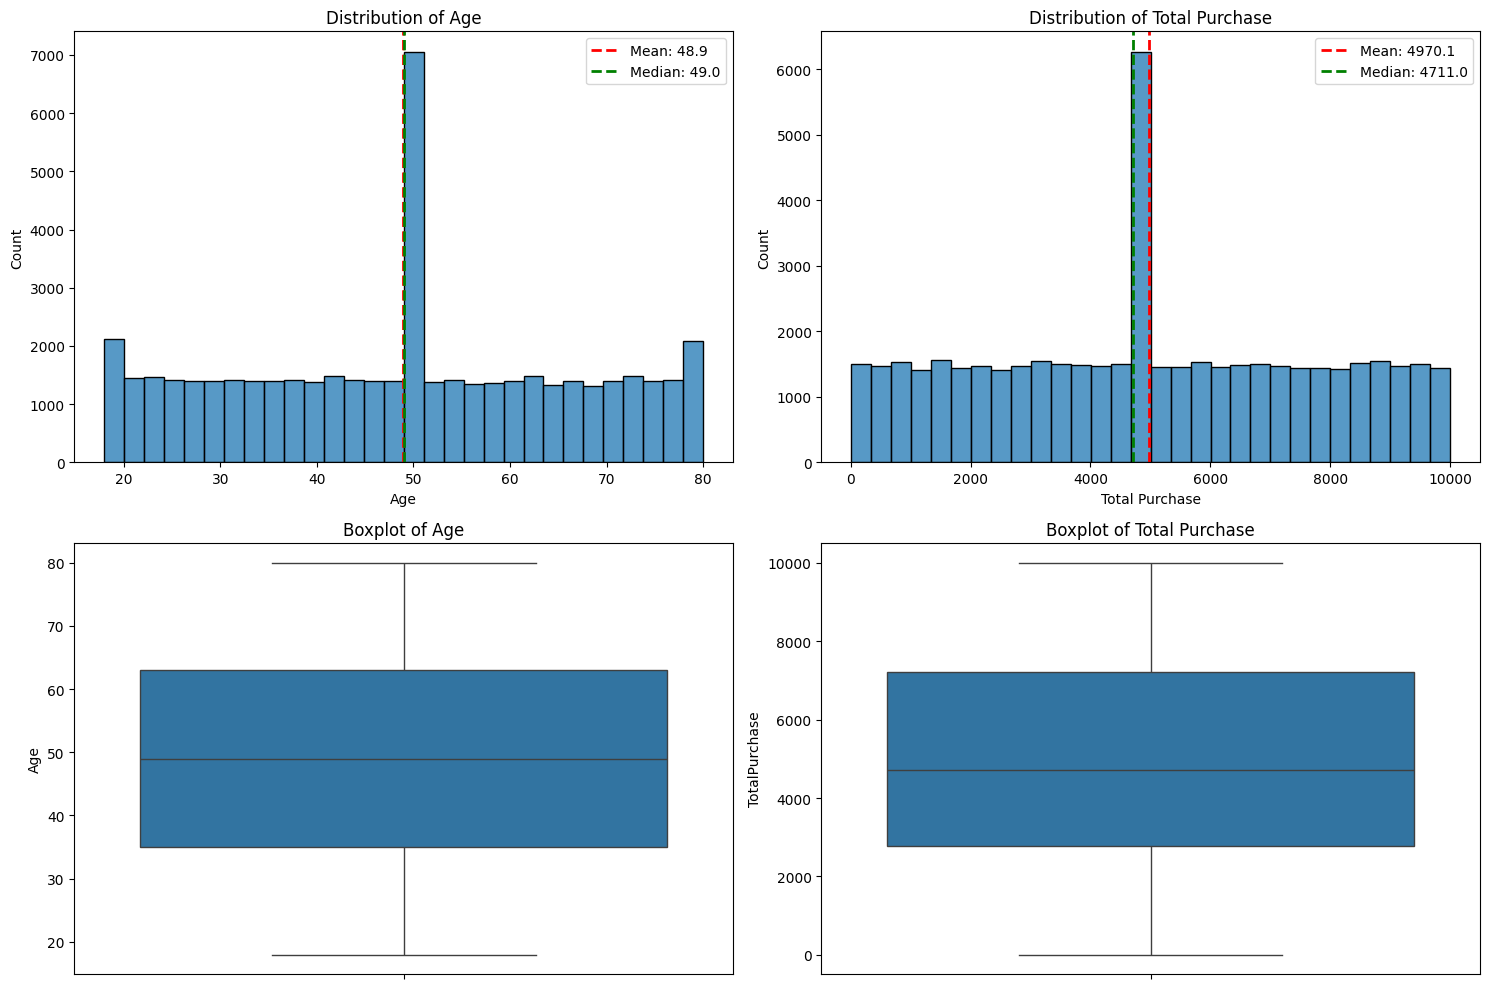


Summary Statistics for Age:
count    49208.000000
mean        48.883393
std         17.290660
min         18.000000
25%         35.000000
50%         49.000000
75%         63.000000
max         80.000000
Name: Age, dtype: float64

Summary Statistics for TotalPurchase:
count    49208.000000
mean      4970.057106
std       2742.403771
min         10.170000
25%       2780.500000
50%       4711.030000
75%       7216.962500
max       9999.580000
Name: TotalPurchase, dtype: float64


In [111]:
# Plotting Age and TotalPurchase distributions after handling outliers
# Set up the figure for histograms
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Age with mean and median
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.axvline(df['Age'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Plot 2: Distribution of TotalPurchase with mean and median
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='TotalPurchase', bins=30)
plt.axvline(df['TotalPurchase'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {df["TotalPurchase"].mean():.1f}')
plt.axvline(df['TotalPurchase'].median(), color='green', linestyle='dashed', linewidth=2, label=f'Median: {df["TotalPurchase"].median():.1f}')
plt.title('Distribution of Total Purchase')
plt.xlabel('Total Purchase')
plt.ylabel('Count')
plt.legend()

# Plot 3: Boxplot of Age
plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='Age')
plt.title('Boxplot of Age')

# Plot 4: Boxplot of TotalPurchase
plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='TotalPurchase')
plt.title('Boxplot of Total Purchase')

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nSummary Statistics for Age:")
print(df['Age'].describe())
print("\nSummary Statistics for TotalPurchase:")
print(df['TotalPurchase'].describe())

### We have handled the null values and outliers, now let's clean the dataset.

In [112]:
for i in ['Gender', 'Country', 'PreferredDevice']:
    print(f"\nUnique values in {i}\n")
    print(df[i].unique())


Unique values in Gender

['Male' 'Female' 'Femlae' 'Unknown' 'mle']

Unique values in Country

['USA' 'UK' 'Indai' 'Germany' 'India' 'Unknown' 'Canda']

Unique values in PreferredDevice

['dasktop' 'Unknown' 'moblie' 'mobile' 'desktop']


In [113]:
for i in ['Gender', 'Country', 'PreferredDevice']:
    print(f"\nCount for {i}\n")
    print(df[i].value_counts())


Count for Gender

Gender
Unknown    21073
Femlae      7106
Female      7085
mle         6977
Male        6967
Name: count, dtype: int64

Count for Country

Country
Unknown    12211
Indai       6283
India       6179
USA         6175
Germany     6169
UK          6125
Canda       6066
Name: count, dtype: int64

Count for PreferredDevice

PreferredDevice
Unknown    16536
dasktop     8258
mobile      8192
desktop     8176
moblie      8046
Name: count, dtype: int64


In [114]:
# Handling inconsistent entries
df.loc[df['Gender'] == 'Femlae', 'Gender'] = 'Female'
df.loc[df['Gender'] == 'mle', 'Gender'] = 'Male'

df.loc[df['Country'] == 'Indai', 'Country'] = 'India'
df.loc[df['Country'] == 'Canda', 'Country'] = 'Canada'

df.loc[df['PreferredDevice'] == 'moblie', 'PreferredDevice'] = 'mobile'
df.loc[df['PreferredDevice'] == 'dasktop', 'PreferredDevice'] = 'desktop'

# Checking unique values after cleaning
for i in ['Gender', 'Country', 'PreferredDevice']:
    print(f"\nCount of {i} after cleaning\n")
    print(df[i].value_counts())


Count of Gender after cleaning

Gender
Unknown    21073
Female     14191
Male       13944
Name: count, dtype: int64

Count of Country after cleaning

Country
India      12462
Unknown    12211
USA         6175
Germany     6169
UK          6125
Canada      6066
Name: count, dtype: int64

Count of PreferredDevice after cleaning

PreferredDevice
Unknown    16536
desktop    16434
mobile     16238
Name: count, dtype: int64


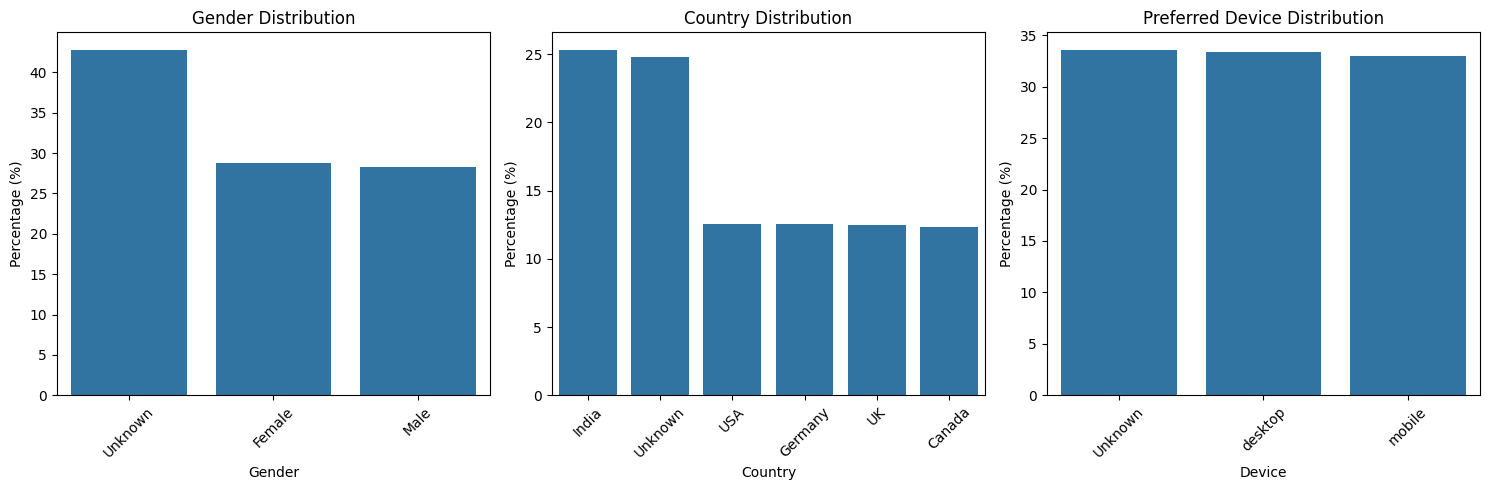


Gender Distribution:
Gender
Unknown    42.82
Female     28.84
Male       28.34
Name: proportion, dtype: float64

Country Distribution:
Country
India      25.33
Unknown    24.82
USA        12.55
Germany    12.54
UK         12.45
Canada     12.33
Name: proportion, dtype: float64

Preferred Device Distribution:
PreferredDevice
Unknown    33.6
desktop    33.4
mobile     33.0
Name: proportion, dtype: float64


In [115]:
# Set up the figure for categorical plots
plt.figure(figsize=(15, 5))

# Plot 1: Gender Distribution
plt.subplot(1, 3, 1)
gender_pct = df['Gender'].value_counts(normalize=True) * 100
sns.barplot(x=gender_pct.index, y=gender_pct.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Plot 2: Country Distribution
plt.subplot(1, 3, 2)
country_pct = df['Country'].value_counts(normalize=True) * 100
sns.barplot(x=country_pct.index, y=country_pct.values)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Plot 3: Preferred Device Distribution
plt.subplot(1, 3, 3)
device_pct = df['PreferredDevice'].value_counts(normalize=True) * 100
sns.barplot(x=device_pct.index, y=device_pct.values)
plt.title('Preferred Device Distribution')
plt.xlabel('Device')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the exact percentages
print("\nGender Distribution:")
print(gender_pct.round(2))
print("\nCountry Distribution:")
print(country_pct.round(2))
print("\nPreferred Device Distribution:")
print(device_pct.round(2))

In [119]:
#Exporting the cleaned dataset
df.to_csv("cleaned_customer_data.csv", index=False)